# Inteligencia Artificial.    
# Proyecto Pokelegends

## Diego Gonzales
## Alma Judith Trigos
## Javier Galvis 

Dataset: https://www.kaggle.com/abcsds/pokemon

In [ ]:
#Declaración de librerías.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.layers import LSTM
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import classification_report
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
## Lectura del dataset y muestra del inicio de las etiquetas.
df = pd.read_csv("Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


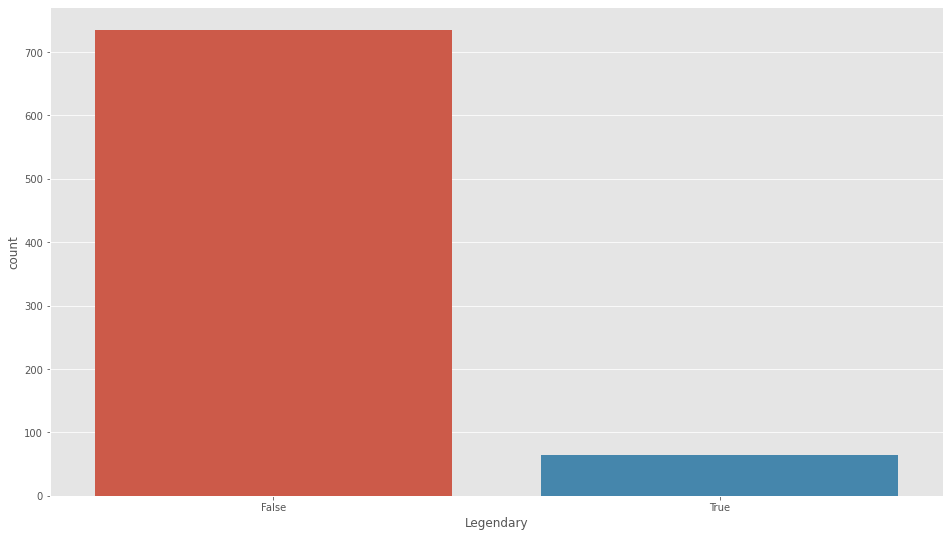

In [ ]:
#Cantidad de legendarios comparados con los normales.
sns.countplot(df["Legendary"])

In [ ]:
#Se procederá a darle valores a las clases de pokemones ya que se encuentran en formato string.
df["Type 1"] = LabelEncoder().fit_transform(df["Type 1"])
df["Type 2"] = df["Type 2"].fillna("Null") #Se remueven los espacios vacios.
df["Type 2"] = LabelEncoder().fit_transform(df["Type 2"])
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,9,14,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,9,14,405,60,62,63,80,80,60,1,False
2,3,Venusaur,9,14,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,9,14,625,80,100,123,122,120,80,1,False
4,4,Charmander,6,13,309,39,52,43,60,50,65,1,False


In [ ]:
X = df.drop(['Name', 'Legendary'], axis = 1)
y = df['Legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Matthews_corrcoef 0.6669549744296803
Accuracy 0.95
F1 0.6875000000000001


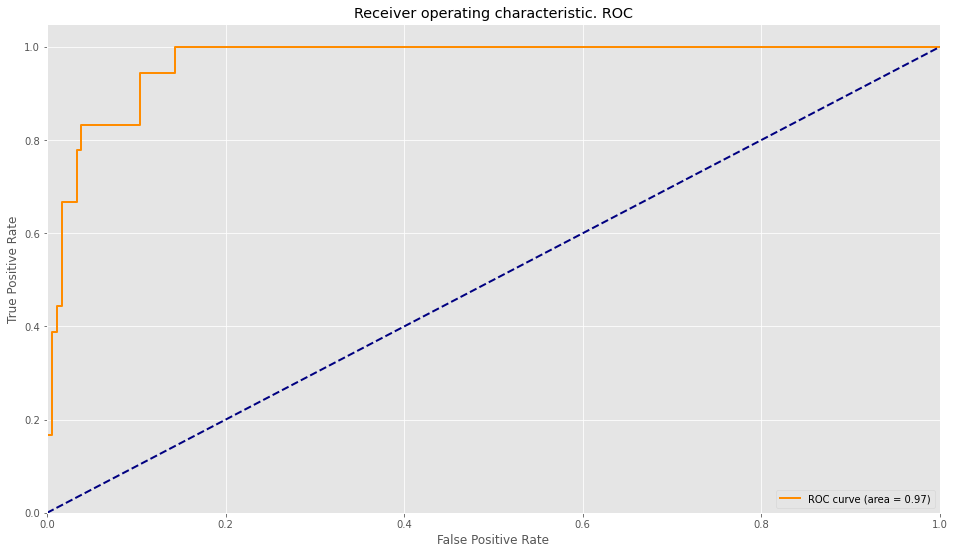

In [ ]:
#Método 1, Regresión logística, adaptada de tareas hechas anteriormente.
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_test_predicted = LR.predict(X_test)
y_test_scores = LR.predict_proba(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("Matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
F1 = f1_score(y_test, y_test_predicted)
print("F1", F1)
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores[:,1])
roc_auc=roc_auc_score(y_test, y_test_scores[:,1])
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Método 2, Red neuronal usando keras de 3 capas ocultas.
ANN = Sequential()
ANN.add(Dense(12, activation='relu'))
ANN.add(Dense(24, activation='relu',))
ANN.add(Dense(1, activation='sigmoid'))
ANN.compile(optimizer ='Adam',loss='binary_crossentropy',metrics = "accuracy")
early_stop = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='max')
history = ANN.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.2, callbacks=[early_stop])

Epoch 00060: early stopping


In [ ]:
#Presición de la ANN.
y_pred_test_nn = ANN.predict(X_test)
y_train_pred_nn = ANN.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.741
The R2 score on the Test set is:	0.468


In [ ]:
# SVM tomado y editado de "SVM_ejemplos" y "SVM_Ejemplo_2_multiclase"
kernels=['linear', 'poly', 'rbf', 'sigmoid']
#lineal
#Kernel=0
#msv = svm.SVC(kernel=kernels[Kernel])
#polinomial cuadrático
#Kernel=1
#msv = svm.SVC(kernel=kernels[Kernel],degree=2)
#polinomial cúbico
#Kernel=1
#msv = svm.SVC(kernel=kernels[Kernel],degree=3)
#rbf
Kernel=2
msv = svm.SVC(kernel='rbf')
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
msv.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[[180   2]
 [  7  11]]
              precision    recall  f1-score   support

       False       0.96      0.99      0.98       182
        True       0.85      0.61      0.71        18

    accuracy                           0.95       200
   macro avg       0.90      0.80      0.84       200
weighted avg       0.95      0.95      0.95       200

matthews_corrcoef 0.6966571319805062
Accuracy 0.955
F1 0.7096774193548387


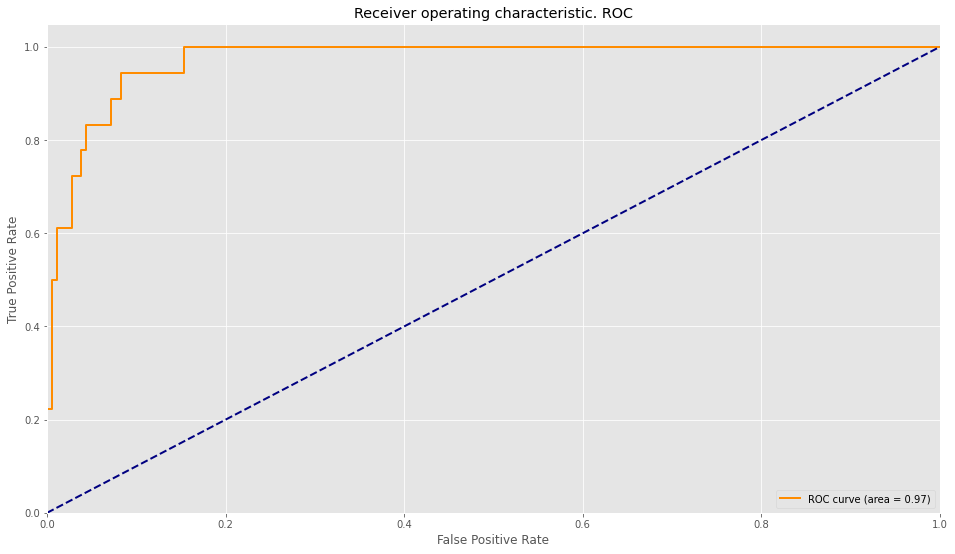

In [ ]:
y_test_predicted = msv.predict(X_test)
print(confusion_matrix(y_test, y_test_predicted))
print(classification_report(y_test, y_test_predicted))
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
F1 = f1_score(y_test, y_test_predicted)
print("F1", F1)
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Implementación de KNN

#Usamos el knn de skelearn e iteramos de 1 a 30 para K, graficando la precisión en cada iteración para ver cuál es el mejor valor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1,7)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

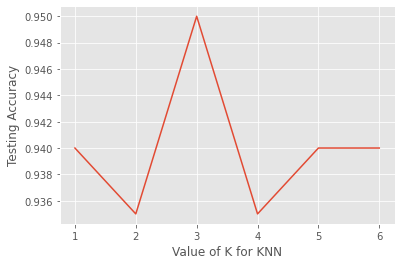

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#Viendo la gráfica se estima que el mejor valor de accuracy se hallaría para 3 distancias al momento de clasificar las muestras

In [ ]:
n_neighbors = 3
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.95


In [ ]:
#Obtenemos la matriz de confusión y otros indicadores relevantes.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[180   2]
 [  8  10]]
              precision    recall  f1-score   support

       False       0.96      0.99      0.97       182
        True       0.83      0.56      0.67        18

    accuracy                           0.95       200
   macro avg       0.90      0.77      0.82       200
weighted avg       0.95      0.95      0.95       200



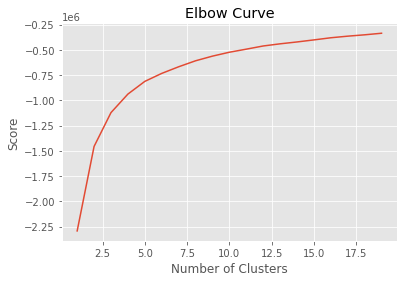

In [ ]:
#Método Kmeans sin uso de etiquetas del dataset.
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

X = np.array(df[["Attack","Defense","Speed"]])
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 85.08284024 110.01775148  49.91715976]
 [ 53.2260274   51.18150685  48.80479452]
 [ 77.21212121  64.79292929  95.1010101 ]
 [127.60283688  90.12056738  92.94326241]]


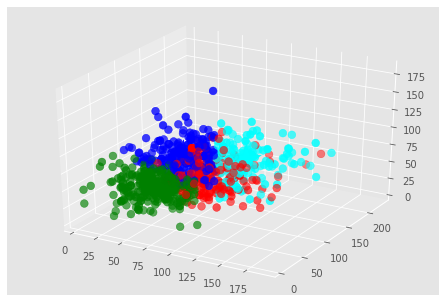

In [ ]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [ ]:
#Representantes de cada grupo, el usuario cercano a su centroide
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
users=df['Name'].values
for row in closest:
    print(users[row])

Gorebyss
Lombre
Furret
Kyurem
